In [ ]:
# 문제 정의 : 의료서비스 밀집 지역과 아닌 지역을 도출해 의료 시설이 충분히 제공되고 있는지 확인하고자 합니다.
# 예상 결과 : 전라도와 강원도 지역이 인프라 밀집도가 낮아 의료 수요가 부족할 것으로 예상됩니다.

In [ ]:
# 데이터 선택 : 전국 병원정보 데이터

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# csv 파일을 로드합니다.
hospital_data = pd.read_csv("1.병원정보서비스 2024.3.csv")

# 데이터 구조를 확인합니다.
print(hospital_data.head())
print(hospital_data.info())


                                             암호화요양기호          요양기관명  종별코드  \
0  JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...  가톨릭대학교 성빈센트병원     1   
1  JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...   가톨릭대학교인천성모병원     1   
2  JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...         강릉아산병원     1   
3  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...         강북삼성병원     1   
4  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...        건국대학교병원     1   

  종별코드명    시도코드 시도코드명   시군구코드 시군구코드명  읍면동   우편번호  ... 치과인턴 인원수 치과레지던트 인원수  \
0  상급종합  310000    경기  310603  수원팔달구   지동  16247  ...        0          0   
1  상급종합  220000    인천  220003  인천부평구  부평동  21431  ...        0          0   
2  상급종합  320000    강원  320100    강릉시  사천면  25440  ...        0          0   
3  상급종합  110000    서울  110016    종로구   평동  03181  ...        0          0   
4  상급종합  110000    서울  110023    광진구  화양동  05030  ...        0          0   

  치과전문의 인원수 한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  한방전문의 인원수  조산사 인원수       좌표(X

In [9]:
# 데이터 샘플링 / 데이터가 커서 원하는 샘플만큼만 학습합니다.
sample_size = 10000  # 원하는 샘플 크기
hospital_data = hospital_data.sample(n=sample_size, random_state=42)

print(hospital_data)

                                                 암호화요양기호          요양기관명  종별코드  \
23551  JDQ4MTg4MSM1MSMkMiMkNCMkMDAkNDgxOTYxIzMxIyQxIy...     압구정김정목안과의원    31   
74750  JDQ4MTYyMiM1MSMkMSMkMCMkMTMkNDgxMzUxIzIxIyQxIy...          진솔한의원    93   
56860  JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNDgxMTkxIzMxIyQxIy...      파크에비뉴치과의원    51   
43268  JDQ4MTYyMiM1MSMkMSMkMCMkNzIkNDgxOTYxIzUxIyQyIy...       드림하이치과의원    51   
41693  JDQ4MTYyMiM4MSMkMSMkMCMkNzIkMzgxMTkxIzExIyQxIy...     김태완아이봄치과의원    51   
...                                                  ...            ...   ...   
47120  JDQ4MTYyMiM1MSMkMSMkMCMkNzIkNDgxMzUxIzExIyQxIy...     서울미(美)치과의원    51   
60626  JDQ4MTYyMiM4MSMkMSMkMCMkOTIkMzgxNzAyIzExIyQxIy...  군위군부계면대율보건진료소    73   
47865  JDQ4MTYyMiM1MSMkMSMkMCMkNzIkNTgxOTYxIzExIyQxIy...      서울이로움치과의원    51   
28206  JDQ4MTYyMiM1MSMkMiMkMCMkMDAkNDgxOTYxIzMxIyQxIy...        웰정형외과의원    31   
65337  JDQ4MTYyMiM2MSMkMSMkMiMkMTMkMzgxNzAyIzMxIyQxIy...         김주남한의원    93   

       종별코드명    시도코드 시도코드명 

In [12]:
# 클러스터링에 사용할 변수를 선택합니다.
X = hospital_data[['시도코드', '시군구코드']]
print(X)

         시도코드   시군구코드
23551  110000  110001
74750  310000  312300
56860  110000  110001
43268  220000  220006
41693  230000  230003
...       ...     ...
47120  310000  312300
60626  230000  230200
47865  310000  312500
28206  310000  310403
65337  340000  340012

[10000 rows x 2 columns]


In [13]:
# 데이터 정규화를 합니다.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hospital_data[['시도코드', '시군구코드']])

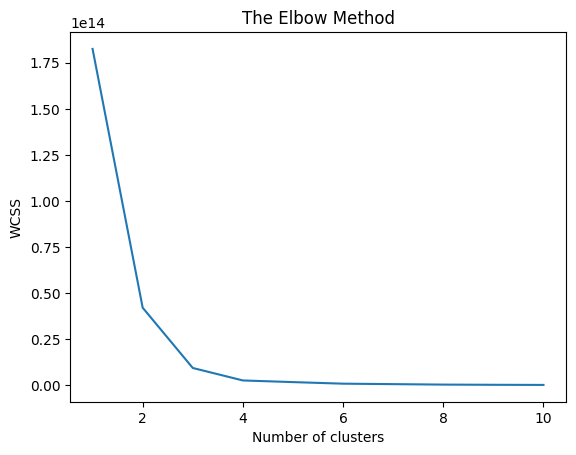

In [14]:
# 엘보우 방법으로 최적의 클러스터 수 결정합니다.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# WCSS 그래프로 나타냅니다.
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
# 결정된 K 값으로 K-means 알고리즘을 초기화하고 클러스터링 수행합니다.
k = 15  # 클러스터 수 결정
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [58]:
# 각 클러스터의 중심점 분석합니다.
# 클러스터1의 평균 중심점의 지역은 경남
# 클러스터2의 평균 중심점의 지역은 부산
# 클러스터3의 평균 중심점의 지역은 서울
# 클러스터4의 평균 중심점의 지역은 경기
# 클러스터5의 평균 중심점의 지역은 대전
# 클러스터6의 평균 중심점의 지역은 전남
# 클러스터7의 평균 중심점의 지역은 충북
# 클러스터8의 평균 중심점의 지역은 대구
# 클러스터9의 평균 중심점의 지역은 경북
# 클러스터10의 평균 중심점의 지역은 세종
# 클러스터11의 평균 중심점의 지역은 인천
# 클러스터12의 평균 중심점의 지역은 전북
# 클러스터13의 평균 중심점의 지역은 광주
# 클러스터14의 평균 중심점의 지역은 충남
# 클러스터15의 평균 중심점의 지역은 강원
centroids = kmeans.cluster_centers_
print("클러스터 중심점:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1} Center: {centroid[0]}, {centroid[1]}")


클러스터 중심점:
Cluster 1 Center: 381799.709724238, 382265.69811320736
Cluster 2 Center: 210000.0, 210010.94729136143
Cluster 3 Center: 110000.0, 110011.40662526558
Cluster 4 Center: 310000.0, 311316.63171806146
Cluster 5 Center: 253937.5, 253945.23958333334
Cluster 6 Center: 360000.0, 360218.1476323118
Cluster 7 Center: 330000.0, 330101.18644067773
Cluster 8 Center: 230000.0, 230013.49806949787
Cluster 9 Center: 370000.0, 370451.6989010987
Cluster 10 Center: 410000.0, 409999.9999999998
Cluster 11 Center: 220000.0, 220007.56530214404
Cluster 12 Center: 350000.0, 350271.32020997355
Cluster 13 Center: 240000.0, 240003.01388888876
Cluster 14 Center: 340000.0, 340306.83522727253
Cluster 15 Center: 320000.0, 320279.7952755903


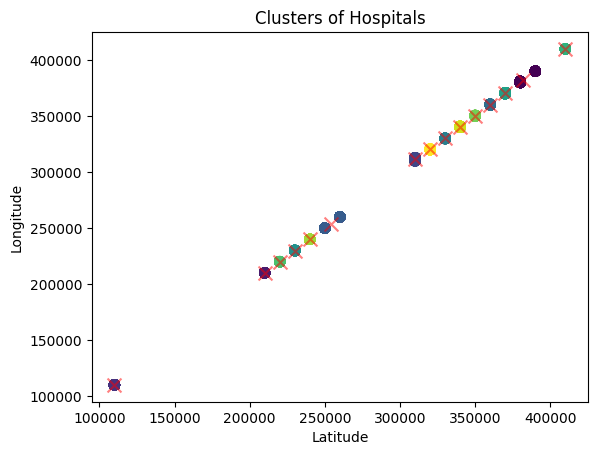

In [61]:
# 클러스터 시각화
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=100, alpha=0.5)
plt.title('Clusters of Hospitals')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [63]:
# 평가: 실루엣 점수 계산
# 실루엣 점수는 k=5일때 0.78, k=8일때 0.81, k=10일때 0.83, k=15일때 0.94로 클러스터가 잘 정의되고 분리되어 있는 것으로 생각됩니다.
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9469076227841466


In [ ]:
# 최종 : 초기 예상은 전라도와 강원도 지역의 의료 인프라 밀집도가 낮을 것으로 예상했으나,
# 실제 결과에서는 세종시를 제외하고 울산이 제일 의료인프라가 적은 것으로 나타났습니다.
# 이를 통해 지역별 의료 서비스 제공 현황을 평가하고, 개선이 필요한 지역을 도출할 수 있습니다.